In [1]:
from packages import *

{{<pagebreak>}}

# Parameter

In [2]:
h = 200*un.mm

l_El = 0.1*un.m
b_w = l_El

E_c = 32100*un.N/un.mm**2
nu = 0.17

put_out(symbolic=True)


$$
\begin{aligned}
h& = 200 \ \mathrm{mm} \quad & l_{El}& = 0.1 \ \mathrm{m} \quad & b_{w}& = l_{El} = 0.1 \ \mathrm{m} \\ 
E_{c}& = 32100.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & \nu& = 0.17 \quad &  
 \end{aligned}
$$

In [3]:
G_c = E_c /(2*(1+nu))

put_out(symbolic=True)


$$
\begin{aligned}
G_{c}& = \frac{E_{c}}{2 \cdot \left(1 + \nu\right)} = 13717.95 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad &  \quad &  
 \end{aligned}
$$

# Platte




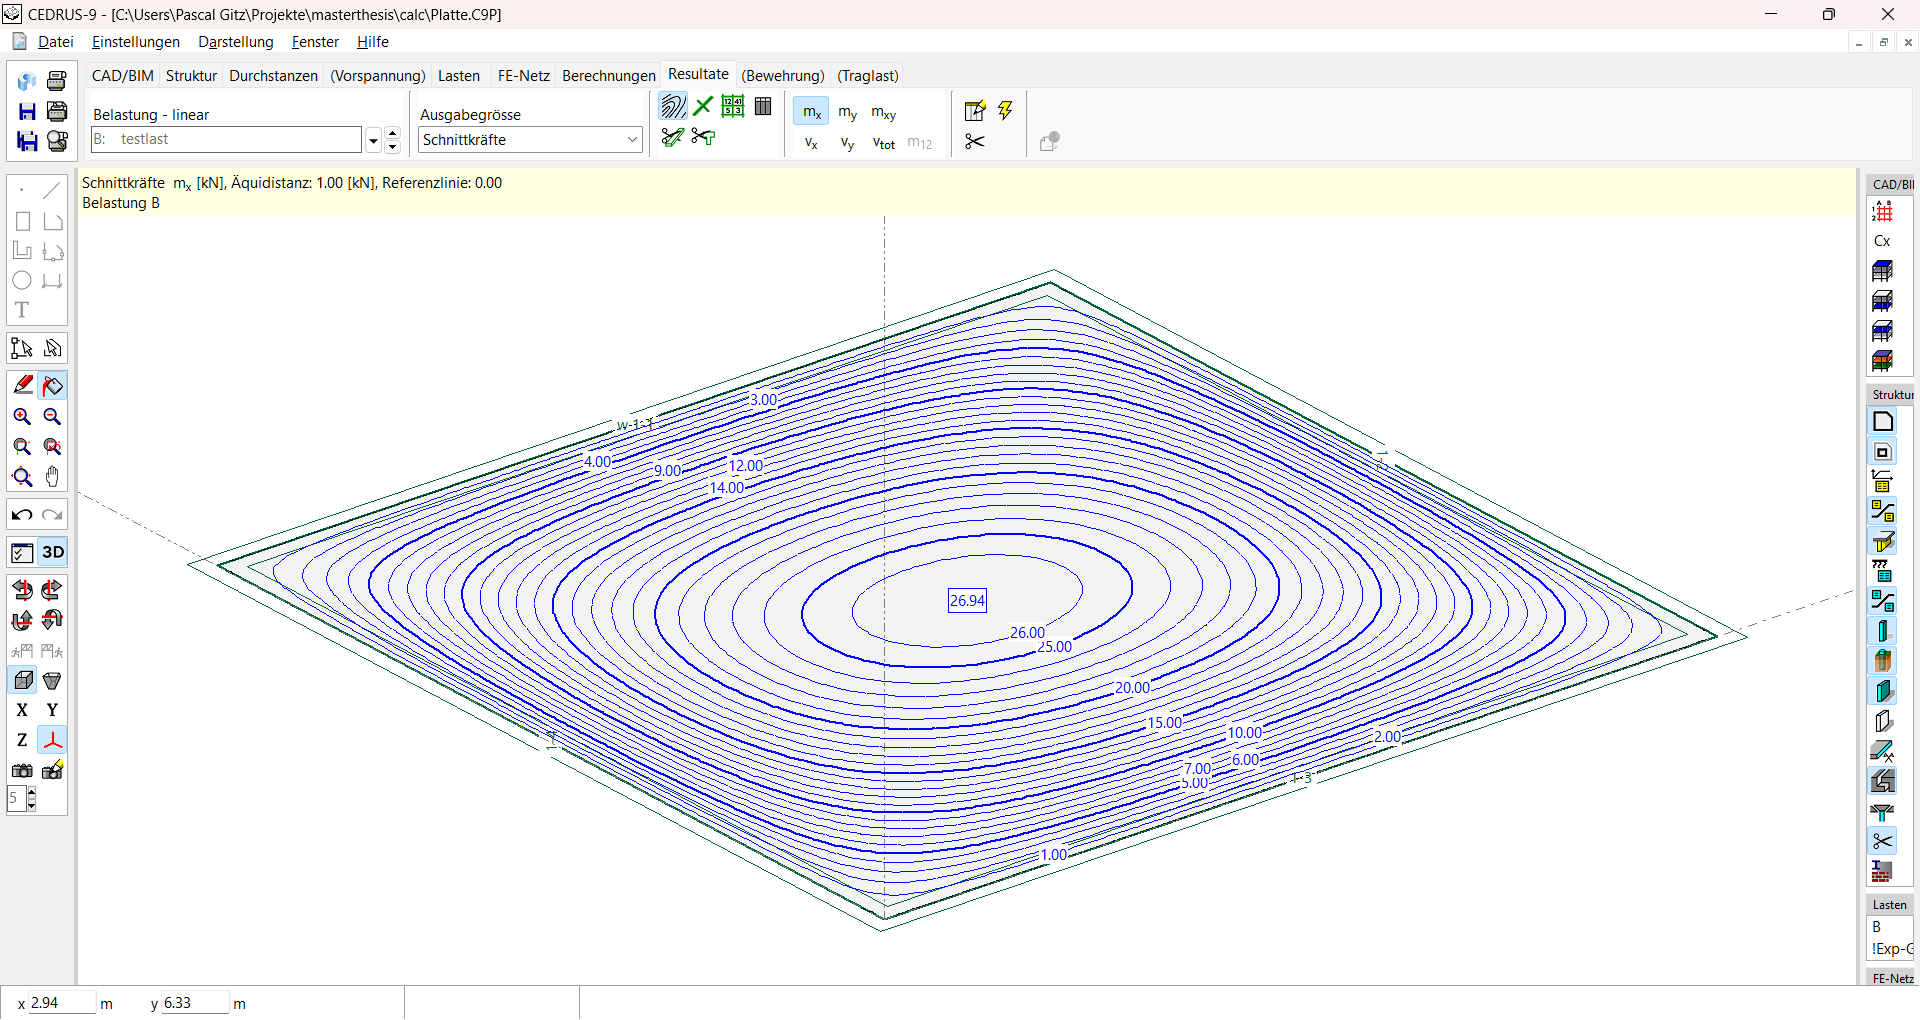

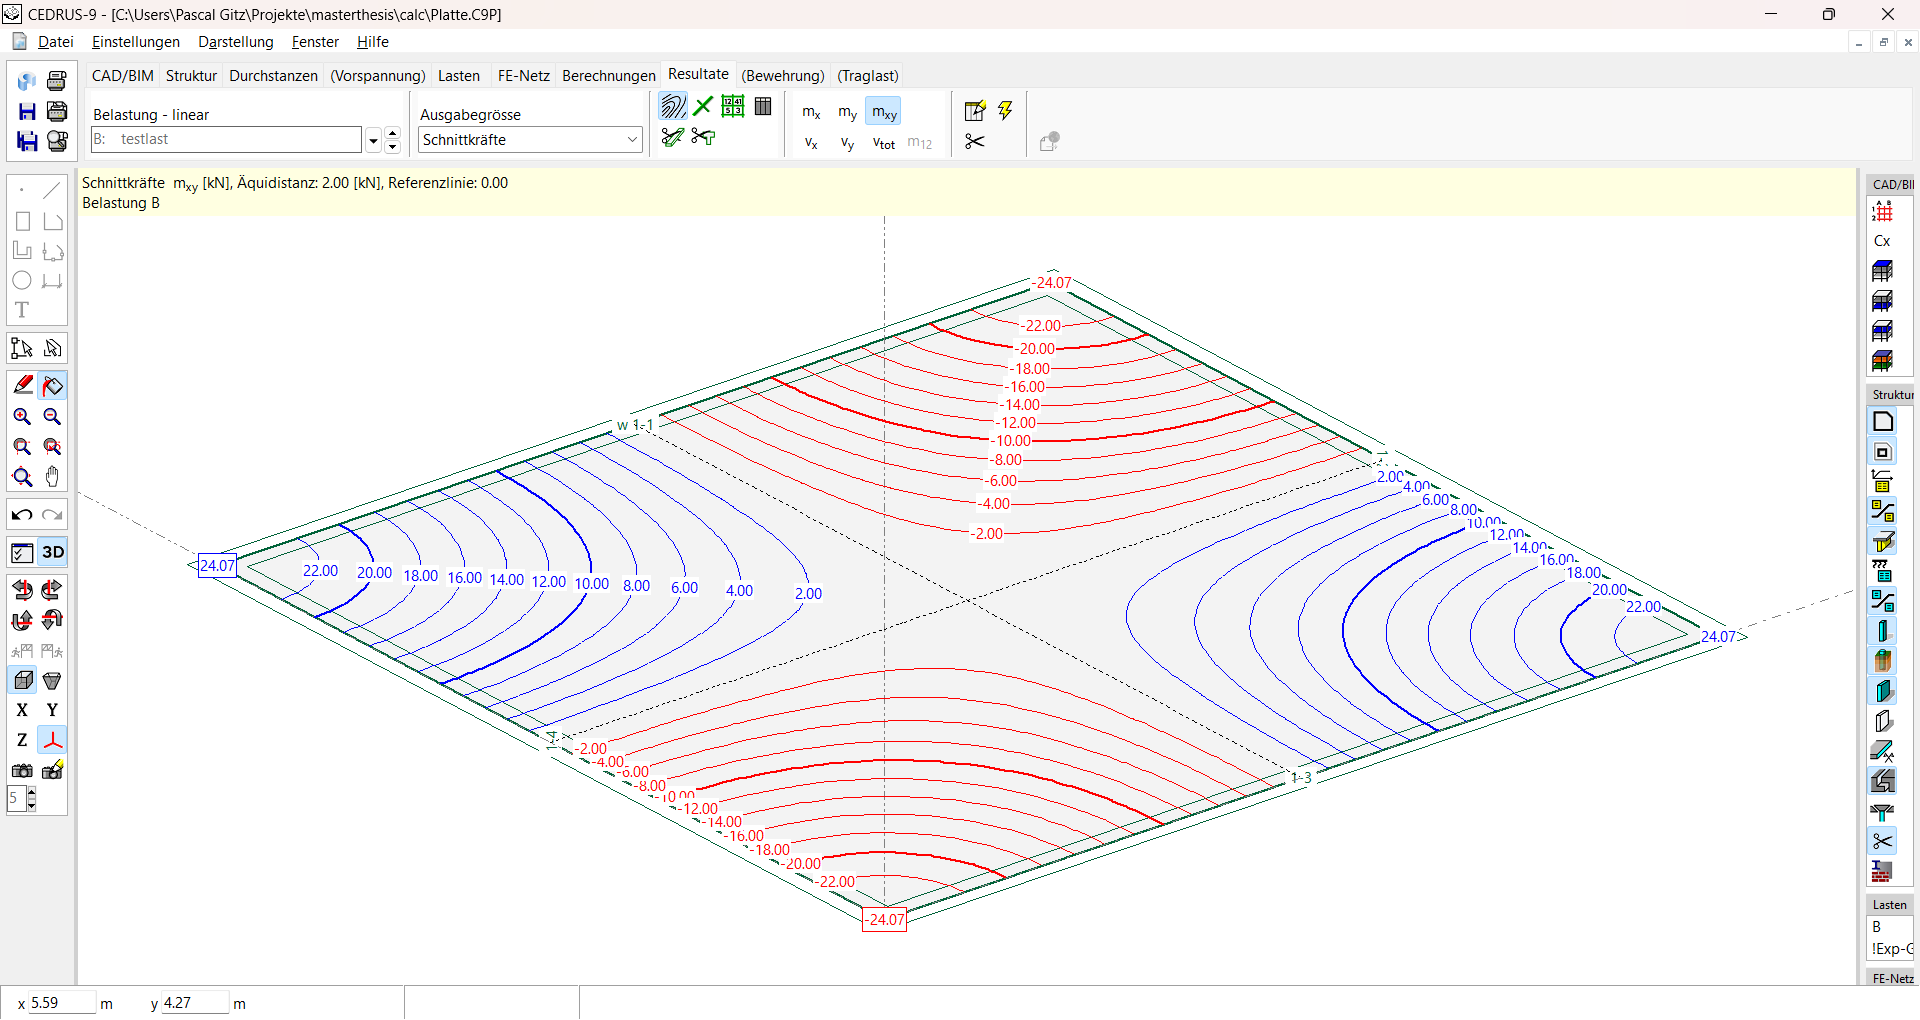




Resultate:

- $M_y = 27 \cdot b_w = 2.7$ kNm
- $M_x = T = 24 \cdot b_w = 2.4$ kNm
- $e_z = 2.88$ mm

# Rostgeometrie

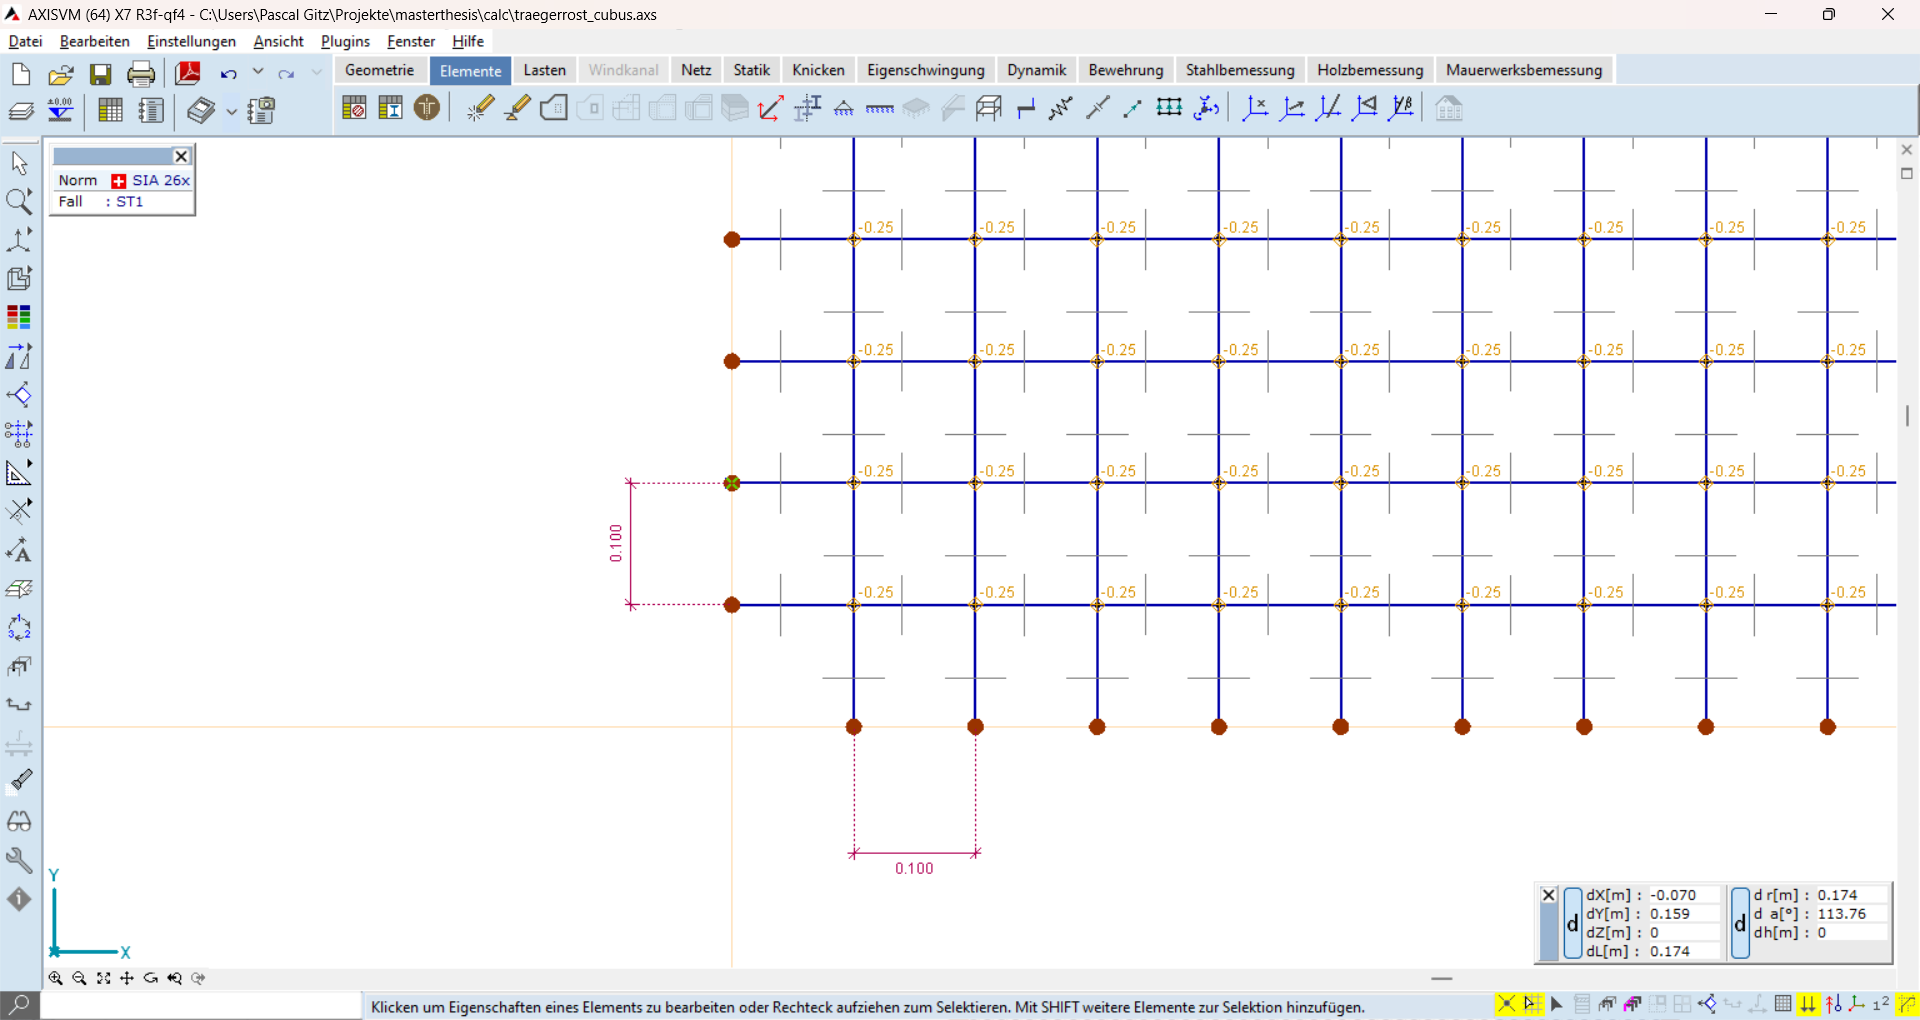

# Biegung

Wird die Platte drillweich modelliert, sowie der Einfluss der Krümmung aus der anderen Richtung auf null gesetzt, decken sich die Verformungen des Trägerrosts und die der Platte. Dies kann mit dem Setzen der Querdehnzahl auf Null erfolgen.


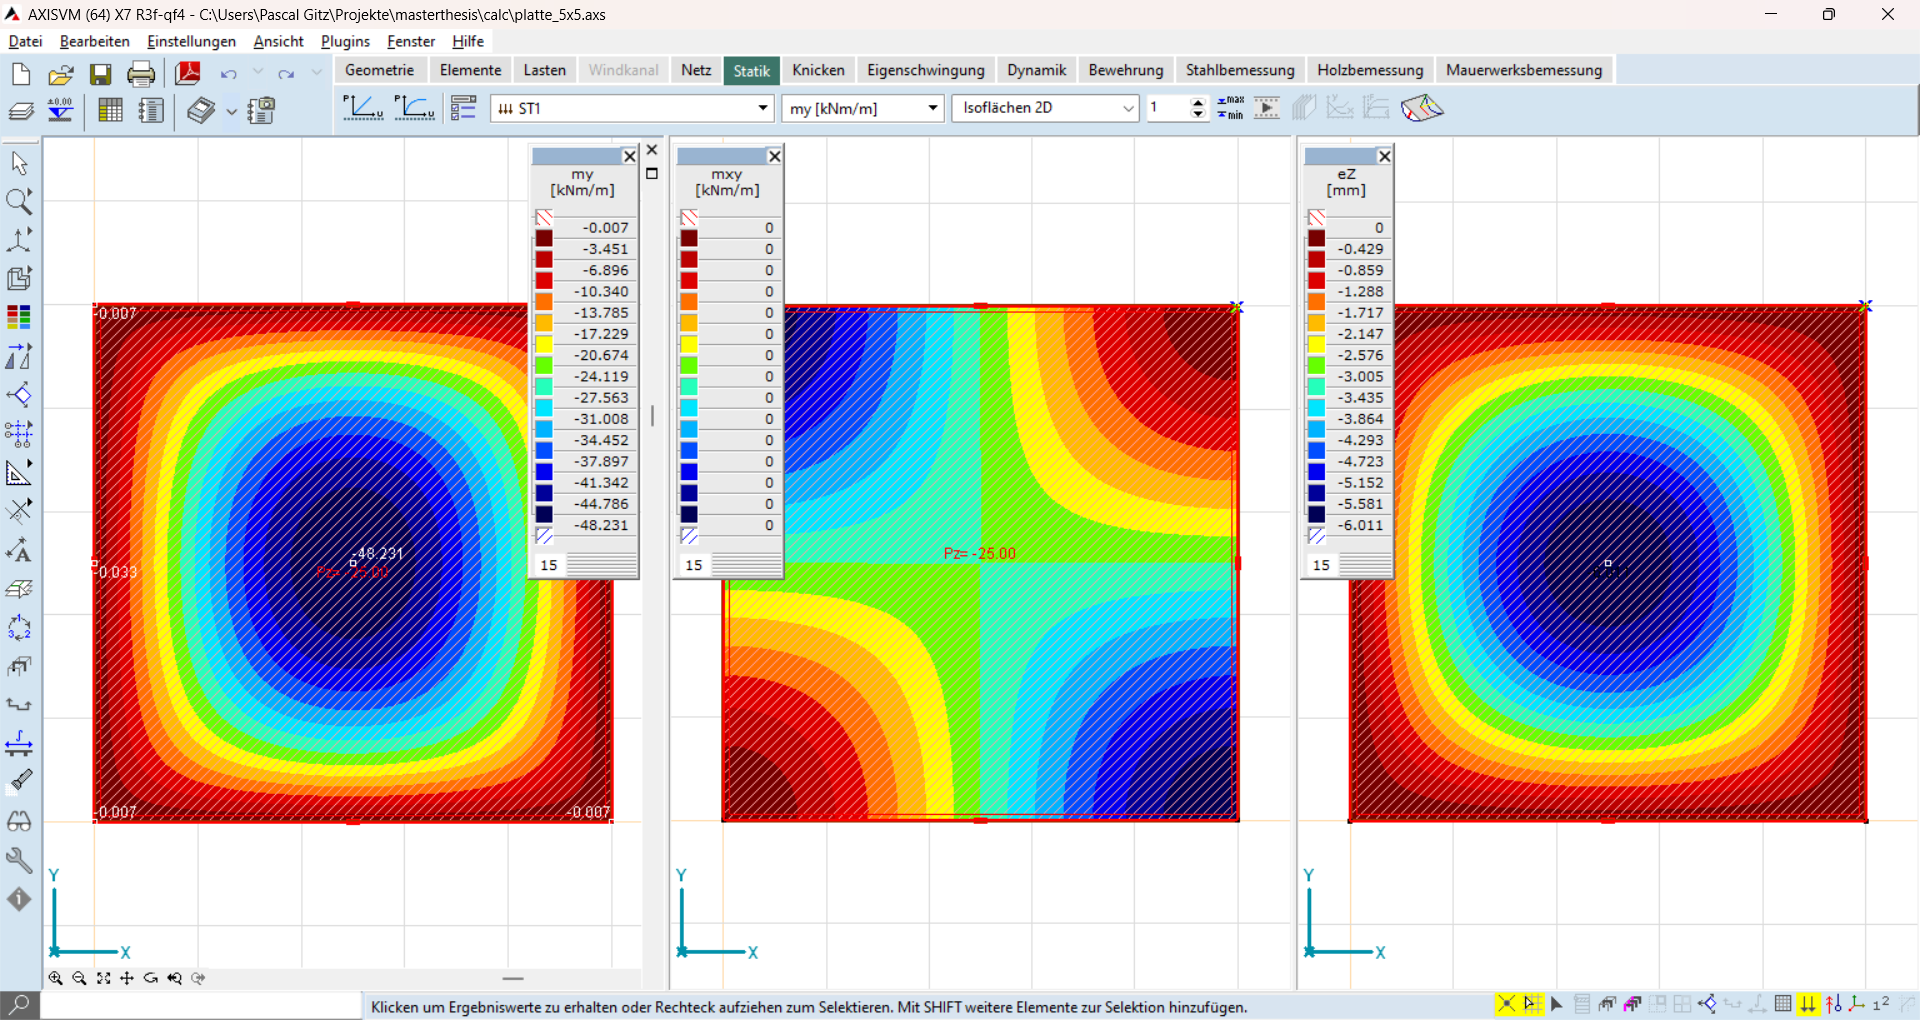

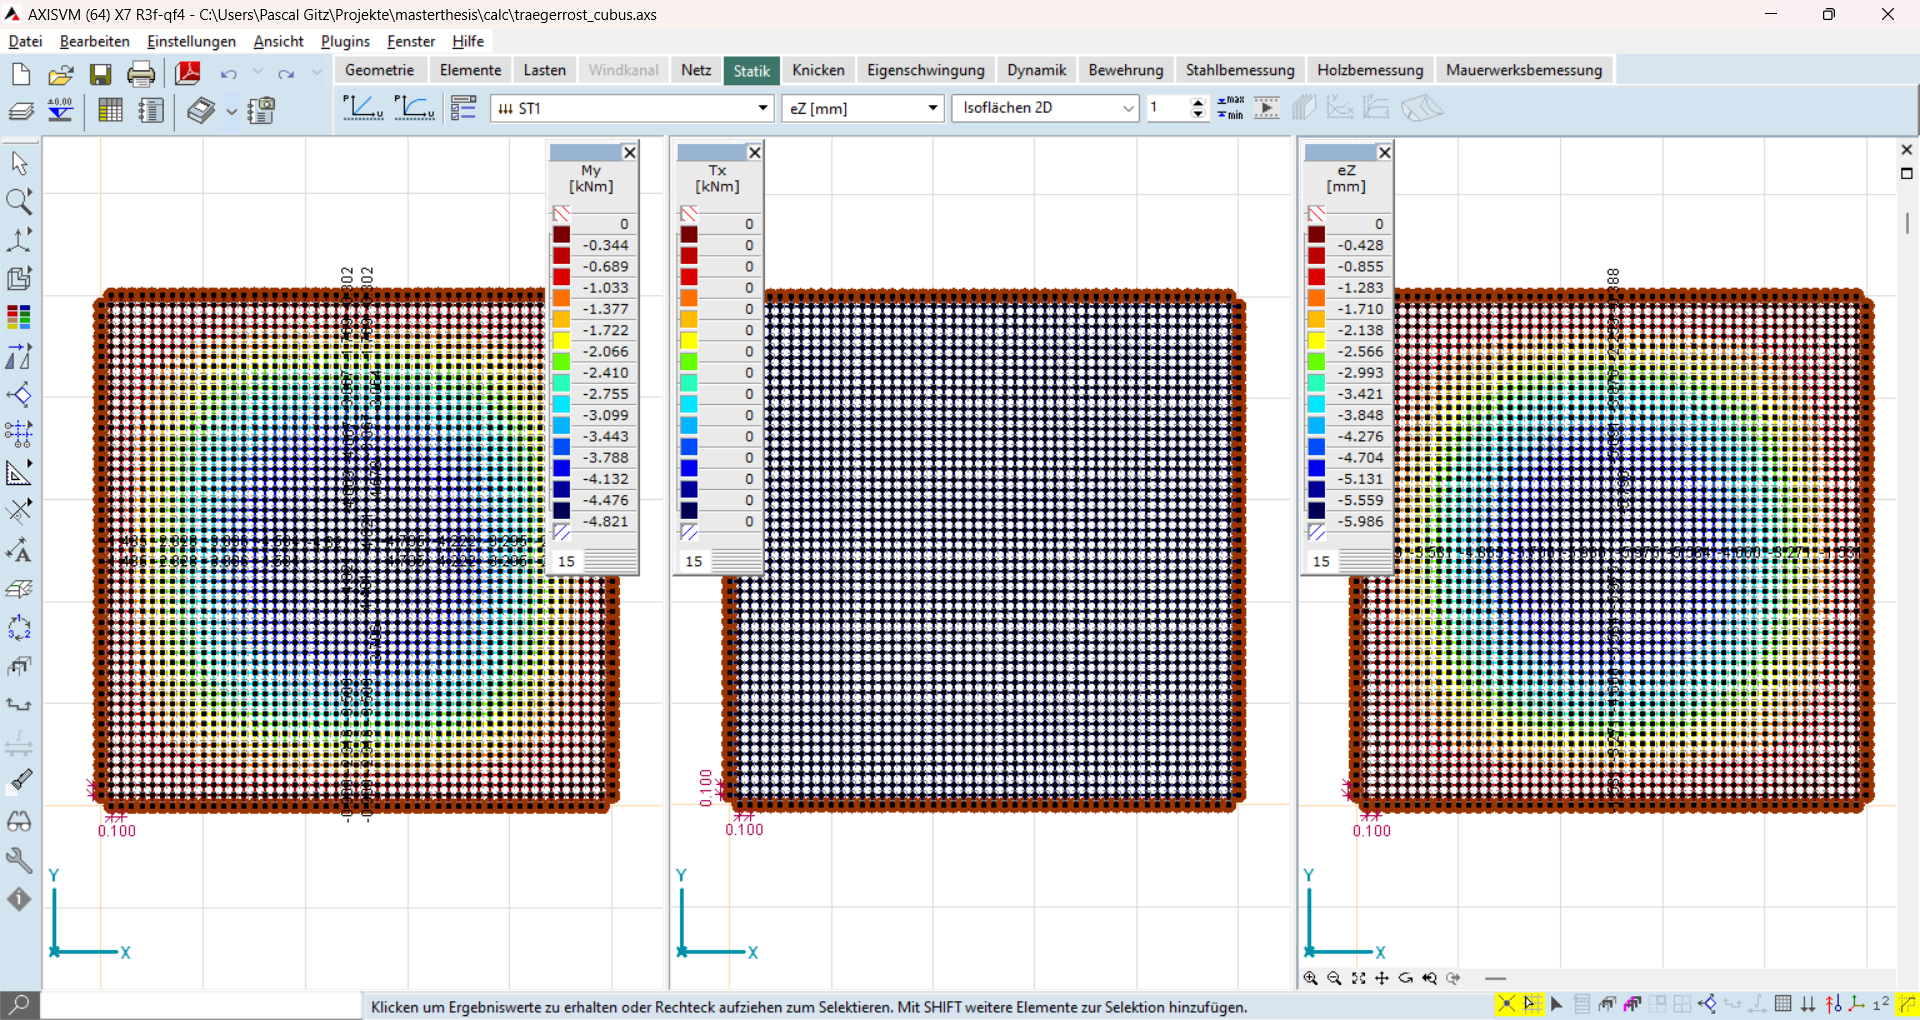

In [4]:
I_y = (h**3 * b_w /12 ).to(un.mm**4)

EI_y = (E_c * I_y).to(un.kN*un.m**2)

EI_yy = (E_c * h**3 / (12*(1-nu**2)) * b_w).to(un.kN*un.m**2)

put_out(symbolic=True, rows = 2)

$$
\begin{aligned}
I_{y}& = \frac{h^{3} \cdot b_{w}}{12} = 66666666.67 \ \mathrm{mm}^{4} \quad & EI_{y}& = E_{c} \cdot I_{y} = 2140.0 \ \mathrm{kN} \cdot \mathrm{m}^{2} \\ 
EI_{yy}& = \frac{E_{c} \cdot h^{3} \cdot b_{w}}{12 \cdot \left(1 - \nu^{2}\right)} = 2203.69 \ \mathrm{kN} \cdot \mathrm{m}^{2} \quad &  
 \end{aligned}
$$

# Torsionssteifigkeit Variante 1

Bestimmung der Drillsteifigkeit nach Blaauwendraad


Definiert mit $\rho_{xy}$ als kinematische Grösse, was der doppelten Krümmung $\chi_{xy}$ entspricht.

In [5]:
Gi_blaa_com_matrix = (E_c * h**3 /(12*(1-nu**2)) * (1-nu)/2).to(un.kN*un.m)
i_xy_blaa = h**3 / 6 /2 
Gi_blaa = (i_xy_blaa * G_c).to(un.kN*un.m)


I_x_blaa = (i_xy_blaa * b_w).to(un.mm**4)
GI_blaa = (I_x_blaa * G_c).to(un.kN*un.m**2)
put_out(symbolic=True, rows = 1,evaluate=False)


$$
\begin{aligned}
Gi_{blaa , matrix}& = \frac{E_{c} \cdot h^{3} \cdot \left(1 - \nu\right)}{12 \cdot \left(1 - \nu^{2}\right) \cdot 2} = 9145.3 \ \mathrm{kN} \cdot \mathrm{m} \\ 
i_{xy blaa}& = \frac{h^{3}}{6 \cdot 2} = 666666.67 \ \mathrm{mm}^{3} \\ 
Gi_{blaa}& = i_{xy blaa} \cdot G_{c} = 9145.3 \ \mathrm{kN} \cdot \mathrm{m} \\ 
I_{x blaa}& = i_{xy blaa} \cdot b_{w} = 66666666.67 \ \mathrm{mm}^{4} \\ 
GI_{blaa}& = I_{x blaa} \cdot G_{c} = 914.53 \ \mathrm{kN} \cdot \mathrm{m}^{2} \end{aligned}
$$

Mit $GI_{xblaa}$ angesetzt folgen die Schnittgrössen:



Ohne Einfluss der Biegung um beide Achsen:



# Torsionssteifigkeit Variante 2

Am sehr schmalen Plattenelement $t<<b$.

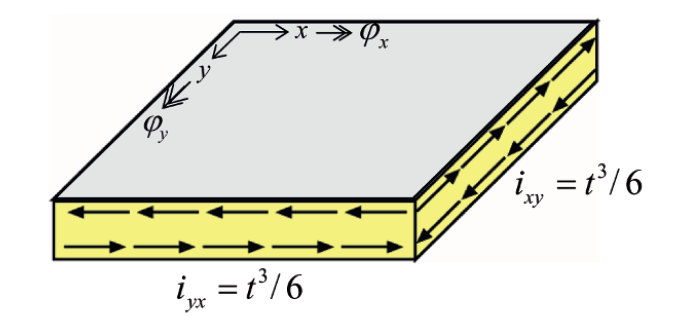

In [6]:
i_xy = h**3 / 6
G_c
Gi_xy_schmal = (G_c * i_xy).to(un.kNm)


I_x_schmal = (h**3 / 6 * b_w).to(un.mm**4)
GI_xy_schmal = Gi_xy_schmal*b_w

put_out(symbolic=True, rows = 1)


$$
\begin{aligned}
i_{xy}& = \frac{h^{3}}{6} = 1333333.33 \ \mathrm{mm}^{3} \\ 
G_{c}& = \frac{E_{c}}{2 \cdot \left(1 + \nu\right)} = 13717.95 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
Gi_{xy schmal}& = G_{c} \cdot i_{xy} = 18290.6 \ \mathrm{kNm} \\ 
I_{x schmal}& = \frac{h^{3} \cdot b_{w}}{6} = 133333333.33 \ \mathrm{mm}^{4} \\ 
GI_{xy schmal}& = Gi_{xy schmal} \cdot b_{w} = 1829.06 \ \mathrm{kNm} \cdot \mathrm{m} \end{aligned}
$$

# Torsionssteifigkeit Variante 3

Wird direkt auf der Querschnittsebene bestimmt. Hier ebenfalls für $t<<b$. Dies ist nun doppelt so steif.



In [7]:
I_x_qs_schmal = (h**3 * b_w / 3).to(un.mm**4)
GI_x_qs_schmal = (G_c*I_x_qs_schmal).to(un.kN*un.m**2)

put_out(symbolic=True,rows = 1)


$$
\begin{aligned}
I_{x qs schmal}& = \frac{h^{3} \cdot b_{w}}{3} = 266666666.67 \ \mathrm{mm}^{4} \\ 
GI_{x qs schmal}& = G_{c} \cdot I_{x qs schmal} = 3658.12 \ \mathrm{kN} \cdot \mathrm{m}^{2} \end{aligned}
$$

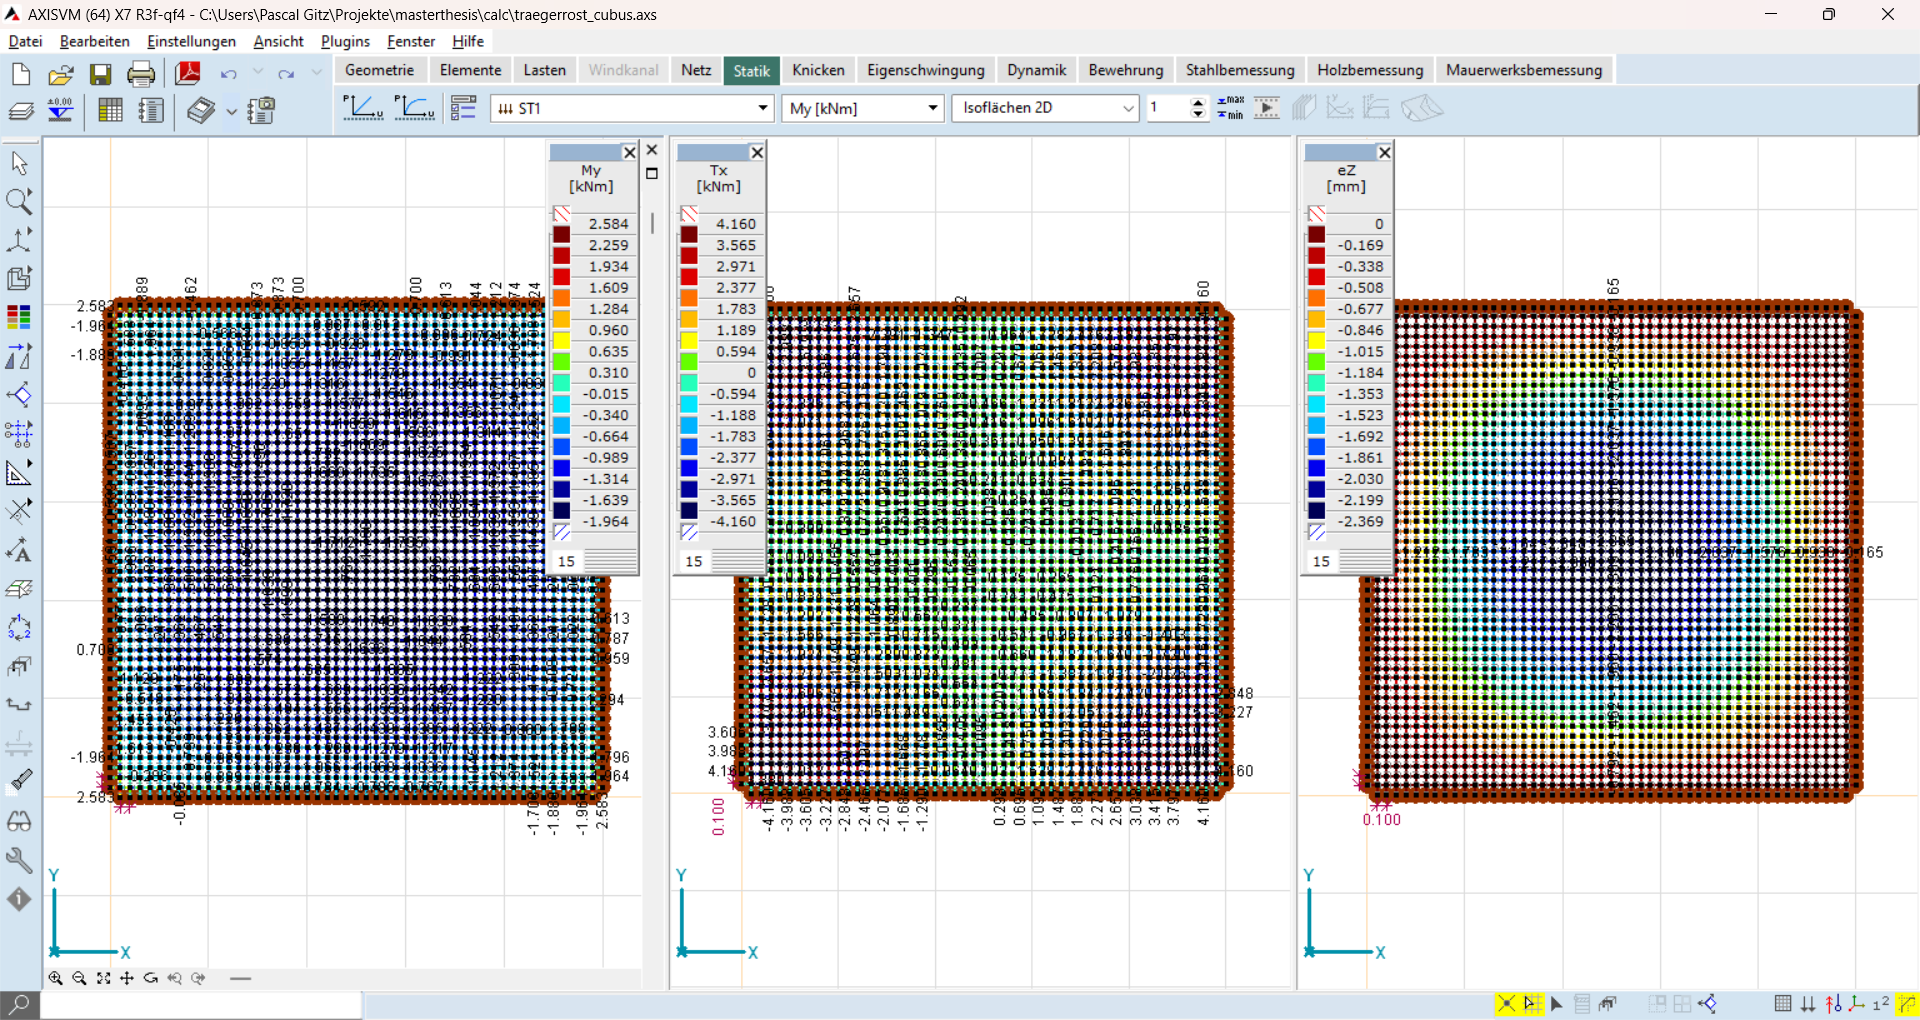

# Torsionssteifigkeit Variante 4

Wird anhand der Torsionssteifigkeit des Rechteckquerschnitts bestimmt.


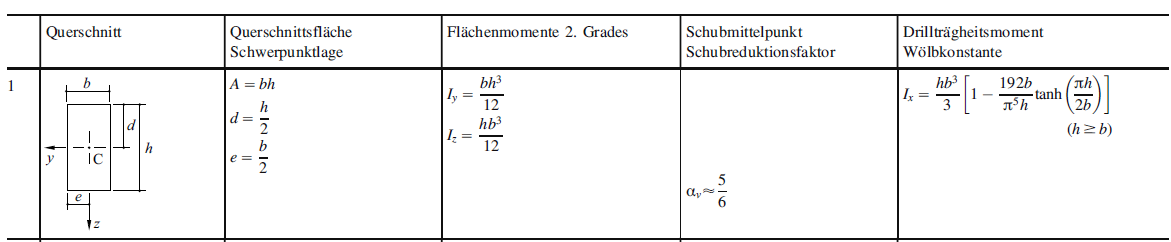

In [8]:
I_x_rechteck = (h * b_w**3 / 3 * (1 - 192*b_w/ (np.pi**5*h)*np.tanh(np.pi*h / (2*b_w)))).to(un.mm**4)
GI_x_rechteck = (G_c*I_x_rechteck).to(un.kN*un.m**2)

put_out(symbolic=True,rows = 1)


$$
\begin{aligned}
I_{x rechteck}& = \frac{h \cdot b_{w}^{3} \cdot \left(1 - \frac{192 \cdot b_{w} \cdot \tanh{\left(\frac{\pi \cdot h}{2 \cdot b_{w}} \right)}}{\pi^{5} \cdot h}\right)}{3} = 45830943.98 \ \mathrm{mm}^{4} \\ 
GI_{x rechteck}& = G_{c} \cdot I_{x rechteck} = 628.71 \ \mathrm{kN} \cdot \mathrm{m}^{2} \end{aligned}
$$

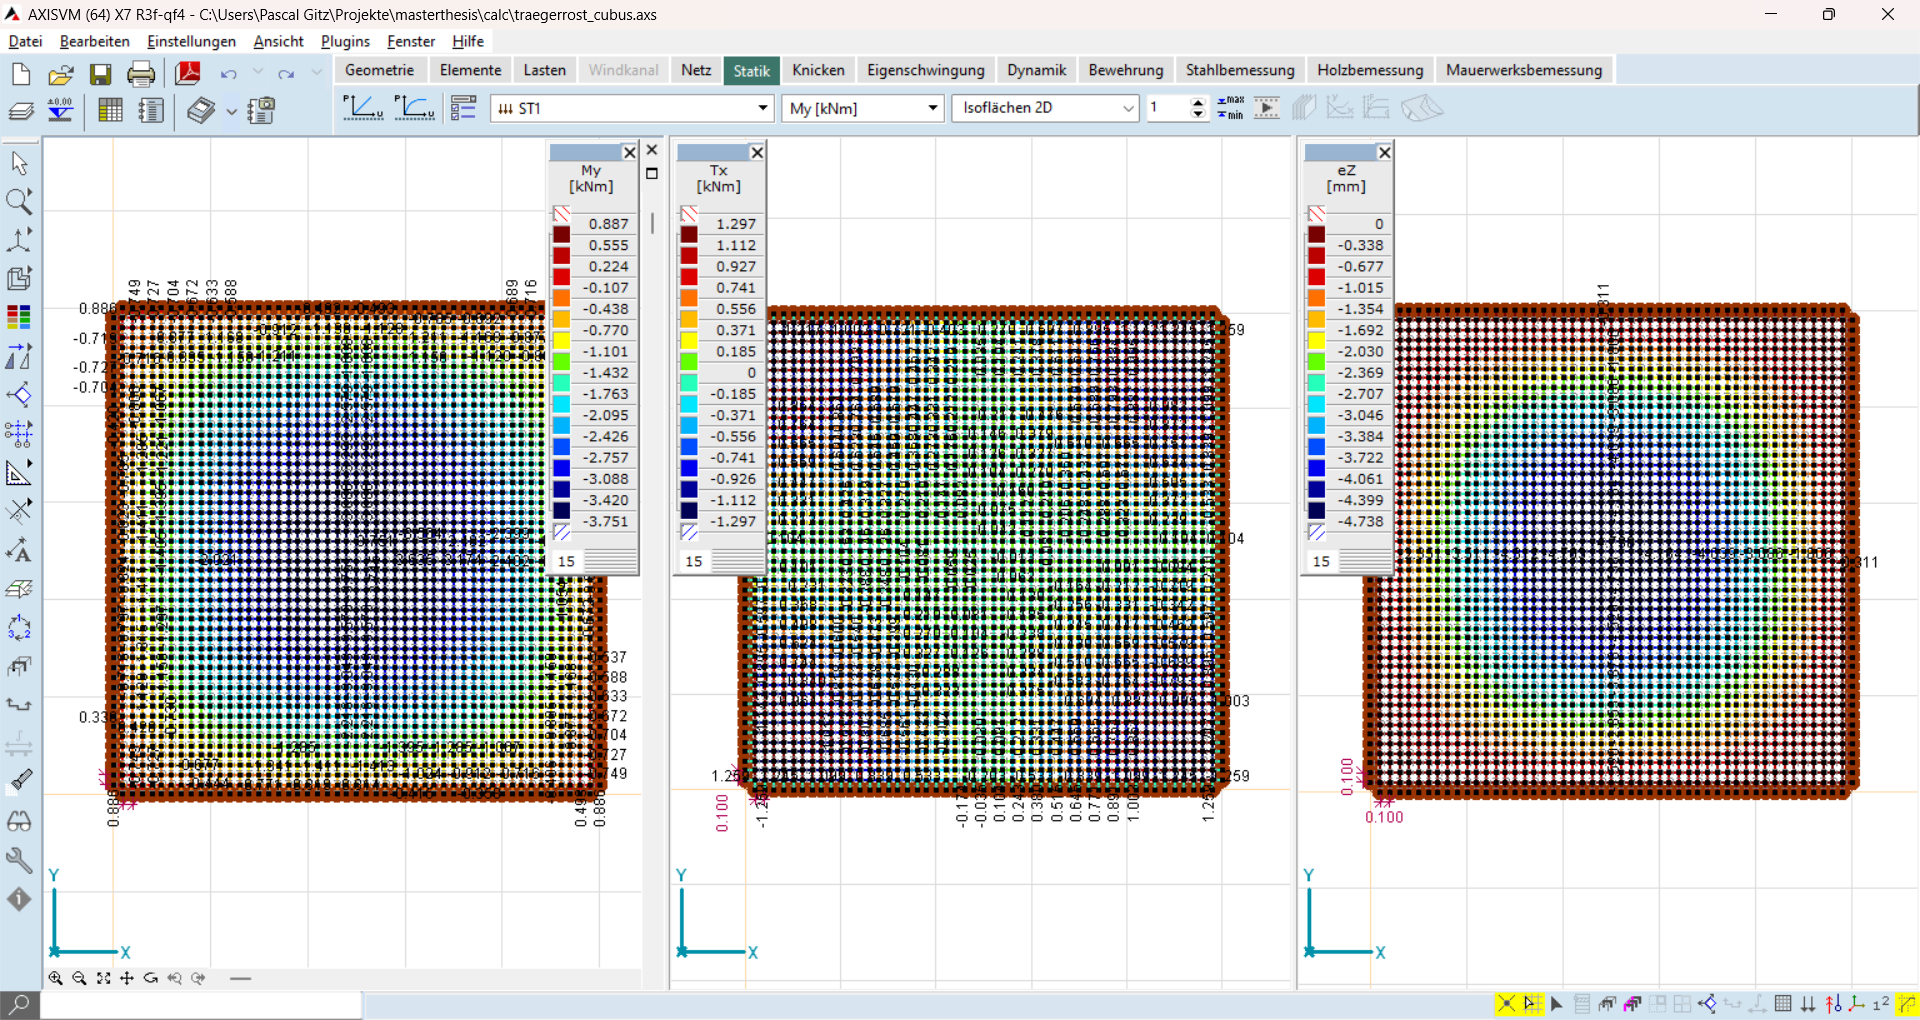


# Zusammenstellung

In [9]:
GI_blaa
GI_xy_schmal
GI_x_qs_schmal
GI_x_rechteck

put_out(symbolic=True, rows = 1)


$$
\begin{aligned}
GI_{blaa}& = I_{x blaa} \cdot G_{c} = 914.53 \ \mathrm{kN} \cdot \mathrm{m}^{2} \\ 
GI_{xy schmal}& = Gi_{xy schmal} \cdot b_{w} = 1829.06 \ \mathrm{kNm} \cdot \mathrm{m} \\ 
GI_{x qs schmal}& = G_{c} \cdot I_{x qs schmal} = 3658.12 \ \mathrm{kN} \cdot \mathrm{m}^{2} \\ 
GI_{x rechteck}& = G_{c} \cdot I_{x rechteck} = 628.71 \ \mathrm{kN} \cdot \mathrm{m}^{2} \end{aligned}
$$

Wenn die schmale Platte die Drillsteifigkeit eines Plattenelements beschreibt, so gibt es keinen Grund für einen Faktor 2. 

# Plattenvergleich

$$
D_b = \frac{Eh^3}{12(1-\nu^2)}
$$

Steifigkeitsmatrix für elastische Platten:

$$
\begin{Bmatrix}
m_{xx} \\
m_{yy} \\
m_{xy}
\end{Bmatrix}
=
D_b
\begin{bmatrix}
1 & \nu & 0 \\
\nu & 1 & 0 \\
0 & 0 & \frac{1}{2}(1 - \nu)
\end{bmatrix}
\begin{Bmatrix}
\kappa_{xx} \\
\kappa_{yy} \\
\rho_{xy}
\end{Bmatrix}
$$

Steifigkeitsmatrix für den Trägerrost:

$$
\begin{Bmatrix}
m_{xx} \\
m_{yy} \\
m_{xy}
\end{Bmatrix}
=
D_b
\begin{bmatrix}
(1-\nu^2) & 0 & 0 \\
0 & (1-\nu^2) & 0 \\
0 & 0 & \frac{1}{2}(1 - \nu)
\end{bmatrix}
\begin{Bmatrix}
\kappa_{xx} \\
\kappa_{yy} \\
\rho_{xy}
\end{Bmatrix}
$$